In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, [0, 2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Implementation

In [3]:
class KNN:
    """
    K- Nearest Neighbors
    
    Attributes
    ----------------
    n_neighbors : int
        number of neighbors to vote
    X : np.ndarray
        matrix of training data
    y : np.ndarray
        vector of training classes
        
    Methods
    -----------------
    fit(X, y)
        fits classifier to data
    predict(X)
        predict classes for samples in matrix X
    __predict(xi)
        predict class for single vector xi
    __distance(x1, x2)
        calculate Euclidean distance between two points x1 and x2
    __majority_vote(labels)
        predict class of given points using majority vote
    """
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y):
        self.data = X
        self.labels = y
    
    def predict(self, X):
        # predict classes for samples
        return np.array([self.__predict(xi) for xi in X])
    
    def __predict(self, xi):
        # predict class for vector xi
        # calculate distances
        distances = [self.__distance(xi, xi_data) for xi_data in self.data]
        # get k neighbors
        neighbors = np.argsort(distances)[:self.n_neighbors]
        # get labels of neighbors
        labels = self.labels[neighbors]
        # count using majority vote
        return self.__majority_vote(labels)
    
    def __distance(self, x1, x2):
        # calculate euclidean distance
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))
    
    def __majority_vote(self, labels):
        # majority vote to predict class
        values, counts = np.unique(labels, return_counts=True)
        idx = np.argmax(counts)
        return values[idx]

# Training Classifier

In [4]:
knn = KNN()
knn.fit(X_train, y_train)

# Validate Classifier

In [5]:
y_pred = knn.predict(X_test)
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred)}')

Accuracy on test set: 0.9111111111111111


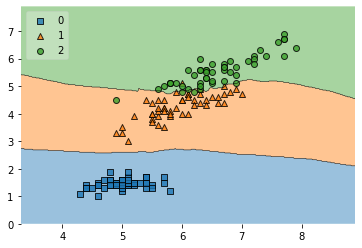

In [6]:
plot_decision_regions(X, y, clf=knn, legend=2)
plt.show()